# 2 a


Solve for the optimal delta at which this orbit does not decay after 10 orbits. 


I began this problem by solving for the conditions which define the apocenters velocity via sdflkas, and used this to then determine the intial conditions of the problem. 



Plugging all that in I could next determine what the total t is for 1 orbital period, and after that I multiplied by 10 to determine the length needed to integrate over 10 orbits. 


Next, I began with an arbitrary delta, and observed what some of these graphs looked like. 


Running through this, I found an effective error tolerance to be 1e-8. Using this there was practically no orbital decay, and will be using this tolerance for the remainder of the experiment on how dynamicaly friction can physically decay black hole binary orbits to the regime where gravitational radiation is the dominant source of orbital decay, until the bodies merge!

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
def f(r,t):
    """
    For some given function with an input r and timestep t, we output the derivative of every value,
    which is in turn used in the rk4 integration 
    """
    
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    
    Dx = vx
    Dy = vy
    
    R = np.sqrt(x**2 + y**2)
    
    Dvx = -G*M*x/R**3
    
    Dvy = -G*M*y/R**3
    
    
    return np.array([Dx,Dy,Dvx,Dvy])

In [86]:
def rk4(h,r,f):
    """
    RK4 Integration for some step size of h
    
    """
    
    k1 = h*f(r,t)
    k2 = h*f(r + 0.5*k1,t+0.5*h)
    k3 = h*f(r + 0.5*k2,t+0.5*h)
    k4 = h*f(r + k3,t+h)

    rout = r + (k1 + 2*k2 + 2*k3 + k4)/6 #update occurs here
    return rout

In [88]:
G = M  = 1
rapo = 1
a = (1 + 1e-7)/2


vy = np.sqrt((G*M) *(2/rapo - 1/a))

In [89]:
a = (1 + 1e-7)/2


T = np.sqrt(4*np.pi**2 * a**3)

In [90]:
10*T

22.214418022954121

In [109]:
t = 0
h0 = 1e-3 # This is now our intial stepsize (5e-4)


int_time = 23 #convert to something for time. 
r0 = np.array([1.0,0.0,0.0,vy],float)


delta = 1e-6 # error tolerance 
r_sols = []
h = h0

norbits = 0
ts = []
while t < int_time: 
    
    rtemp = rk4(h, r0, f)

    # Error at h and 2*h
    rError1 = rk4(h, rtemp, f)
    rError2 = rk4(2*h, r0, f)
    xerror = (rError1[0] - rError2[0])/30.  # 0th element -> x component
    yerror = (rError1[1] - rError2[1])/30.
    rho = h*delta/np.sqrt(xerror**2 + yerror**2)

    # If rho > 1, actual accuracy is better than the target accuracy. Keep it.
    if rho > 1:
        
        print("Worked")
        t += h
        r0 = rtemp
        h = h*rho**(1/4) # Make it bigger since rho^1/4 > 1
        
        
        r_sols.append(rtemp)
        ts.append(t)
        
        #if h / htemp / 2 
        
        #if timestep was never getting larger, 
    elif rho < 1:
        print('adapt')
        h = h * rho**(1/4)
        

        
        
xs = [x[0] for x in r_sols]
vxs = [x[2] for x in r_sols]
ys = [y[1] for y in r_sols]
vys = [y[3] for y in r_sols]

Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt

Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
adapt
Worked


Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt


Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt

Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked

adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
adapt
adapt
adapt
Worked
adapt
adapt
adapt
Worked
adapt
adapt
Worked
adapt
adapt
Worked
adapt
adapt
adapt
adapt
Worked
adapt
adapt
adapt
Worked
adapt
adapt
adapt
Worked
adapt
adapt
adapt
Worked
adapt
adapt
adapt
Worked
adapt
adapt
adapt
Worked
adapt
adapt
Worke

adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked

Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt

Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
adapt
adapt
adapt
Worked
adapt
adapt
adapt
Worked
adapt
adapt
adapt
adapt
Worked
adapt
adapt
Worked
adapt
adapt
adapt
adapt
adapt
Worked
adapt
adapt
adapt
Worked
adapt
adapt
adapt
Worked
adapt
adapt
adapt
Worked
adapt
adapt
Worked
adapt
adapt
adapt
Worked
adapt
adapt
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Work

adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked

Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Wor

Worked
Worked
Worked
Worked
Worked
Worked
adapt
adapt
adapt
adapt
adapt
Worked
adapt
adapt
adapt
adapt
adapt
Worked
adapt
adapt
adapt
Worked
adapt
adapt
adapt
Worked
adapt
adapt
adapt
Worked
adapt
adapt
adapt
adapt
adapt
Worked
adapt
adapt
Worked
adapt
adapt
Worked
adapt
adapt
Worked
adapt
adapt
adapt
adapt
Worked
adapt
adapt
adapt
adapt
Worked
adapt
adapt
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Work

Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt

adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked
adapt
Worked

Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked
Worked

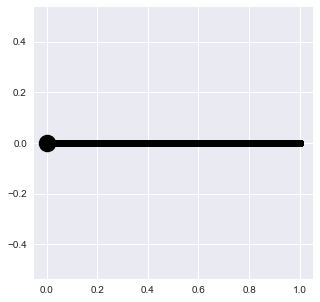

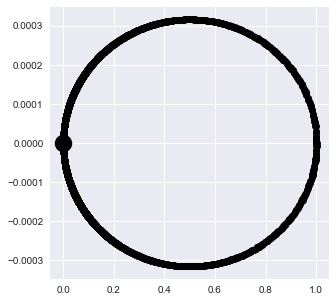

In [113]:
plt.figure(figsize=(5,5))
plt.axis('equal')
plt.plot(xs,ys,'ko')
plt.plot([0],[0],'k.',markersize=35)

plt.figure(figsize=(5,5))
plt.plot(xs,ys,'ko')
plt.plot([0],[0],'k.',markersize=35)

(0.9, 1.1)

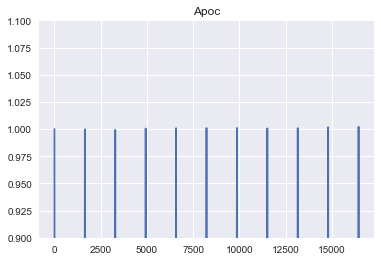

In [111]:
plt.title("Apoc")
plt.plot(xs)

plt.ylim([.9,1.1])

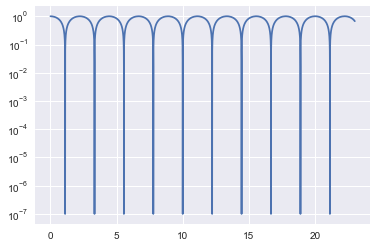

In [112]:

rs = np.sqrt(np.power(xs,2)+np.power(ys,2))

plt.plot(ts,rs)
plt.yscale('log')


# Converting int time to total years


# orbital paremeters are based on I.C r and v

# from r and v0 we can estimate orbital period? t

# 2B 

In [44]:
#updated force eqn will now be 

def f(r,t,AA=1,BB=1):
    """
    For some given function with an input r and timestep t, we output the derivative of every value,
    which is in turn used in the rk4 integration 
    """
    
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    
    Dx = vx
    Dy = vy

    R = np.sqrt(x**2 + y**2)
    V = np.sqrt(vx**2 + vy**2)
    Dvx = -G*M*x/R**3 - AA*vx / (V**3 + BB)
    
    Dvy = -G*M*y/R**3 - AA*vy / (V**3 + BB)
    
    
    return np.array([Dx,Dy,Dvx,Dvy])

In [45]:
def rk4(h,r,f):
    """
    RK4 Integration for some step size of h
    
    """
    
    k1 = h*f(r,t)
    k2 = h*f(r + 0.5*k1,t+0.5*h)
    k3 = h*f(r + 0.5*k2,t+0.5*h)
    k4 = h*f(r + k3,t+h)

    rout = r + (k1 + 2*k2 + 2*k3 + k4)/6 #update occurs here
    return rout

In [46]:
G = M  = 1
rapo = 1
a = (1 + 1e-7)/2


vy = np.sqrt((G*M) *(2/rapo - 1/a))

In [83]:
t = 0
h0 = 1 # This is now our intial stepsize (5e-4)


int_time = 23 #convert to something for time. 
r0 = np.array([1.0,0.0,0.0,0.5],float)
ts = []

delta = 1e-8 # error tolerance 
r_sols = []
h = h0

r_crit  = 1e-7
norbits = 0

while t < int_time: 
    
    rtemp = rk4(h, r0, f)

    # Error at h and 2*h
    rError1 = rk4(h, rtemp, f)
    rError2 = rk4(2*h, r0, f)
    xerror = (rError1[0] - rError2[0])/30.  # 0th element -> x component
    yerror = (rError1[1] - rError2[1])/30.
    rho = h*delta/np.sqrt(xerror**2 + yerror**2)

    # If rho > 1, actual accuracy is better than the target accuracy. Keep it.
    if rho > 1:
        print("Worked")
        t += h
        r0 = rtemp
        #h = h*rho**(1/4) # Make it bigger since rho^1/4 > 1
        r_sols.append(rtemp)
        h = h0
        ts.append(t)
        r_ = np.sqrt(rtemp[0]**2 + rtemp[1]**2)
        print("Current orbital radius: ", r_)
        if r_ <= r_crit: 
            print("Reached gravitational radiation regime!")
            break
    elif rho < 1:
        print('adapt')
        h = h * rho**(1/4)
        
        

#how to say hey! this was 1 orbit

        
        
xs = [x[0] for x in r_sols]
vxs = [x[2] for x in r_sols]
ys = [y[1] for y in r_sols]
vys = [y[3] for y in r_sols]

rs = np.sqrt(np.power(xs,2)+np.power(ys,2))

adapt
Worked
Current orbital radius:  0.999985939714
adapt
Worked
Current orbital radius:  0.999944347074
adapt
Worked
Current orbital radius:  0.999876063821
adapt
Worked
Current orbital radius:  0.999781877029
adapt
Worked
Current orbital radius:  0.999662517852
adapt
Worked
Current orbital radius:  0.99951865963
adapt
Worked
Current orbital radius:  0.999350915355
adapt
Worked
Current orbital radius:  0.999159834538
adapt
Worked
Current orbital radius:  0.998945899519
adapt
Worked
Current orbital radius:  0.998709521255
adapt
Worked
Current orbital radius:  0.998451034668
adapt
Worked
Current orbital radius:  0.998170693596
adapt
Worked
Current orbital radius:  0.997868665463
adapt
Worked
Current orbital radius:  0.997545025729
adapt
Worked
Current orbital radius:  0.997199752239
adapt
Worked
Current orbital radius:  0.996832719565
adapt
Worked
Current orbital radius:  0.996443693453
adapt
Worked
Current orbital radius:  0.996032325481
adapt
Worked
Current orbital radius:  0.9955981

Worked
Current orbital radius:  0.153290735699
adapt
adapt
Worked
Current orbital radius:  0.151534937143
adapt
adapt
Worked
Current orbital radius:  0.149809395139
adapt
adapt
Worked
Current orbital radius:  0.148113554791
adapt
adapt
Worked
Current orbital radius:  0.146446870434
adapt
adapt
Worked
Current orbital radius:  0.144808805498
adapt
adapt
Worked
Current orbital radius:  0.14319883236
adapt
adapt
Worked
Current orbital radius:  0.141616432197
adapt
adapt
Worked
Current orbital radius:  0.140061094842
adapt
adapt
Worked
Current orbital radius:  0.138532318628
adapt
adapt
Worked
Current orbital radius:  0.137029610244
adapt
adapt
Worked
Current orbital radius:  0.135552484579
adapt
adapt
Worked
Current orbital radius:  0.134100464569
adapt
adapt
Worked
Current orbital radius:  0.132673081045
adapt
adapt
Worked
Current orbital radius:  0.131269872572
adapt
adapt
Worked
Current orbital radius:  0.129890385294
adapt
adapt
Worked
Current orbital radius:  0.128534172772
adapt
adap

adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0442959357506
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.04490150513
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0455168150145
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0461420445252
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0467773754667
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0474229924854
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0480790831061
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0487458378235
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0494234502822
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0501121173279
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0508120390719
adapt
adapt
adapt


adapt
Worked
Current orbital radius:  0.532422224376
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.539217641775
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.545970942059
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.552672584141
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.559312813264
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.565881602253
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.572368510245
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.578762435494
adapt
Worked
Current orbital radius:  0.584995754853
adapt
Worked
Current orbital radius:  0.590957818163
adapt
Worked
Current orbital radius:  0.596660776361
adapt
Worked
Current orbital radius:  0.602111883925
adapt
Worked
Current orbital radius:  0.607314838858
adapt
Worked
Current orbital radius:  0.612270802758
adapt
Worked
Current orbital radius:

adapt
adapt
Worked
Current orbital radius:  0.0319886775335
adapt
adapt
Worked
Current orbital radius:  0.0316118044235
adapt
adapt
Worked
Current orbital radius:  0.0312375990341
adapt
adapt
Worked
Current orbital radius:  0.0308658440987
adapt
adapt
Worked
Current orbital radius:  0.0304962945635
adapt
adapt
Worked
Current orbital radius:  0.0301286803828
adapt
adapt
Worked
Current orbital radius:  0.0297627097907
adapt
adapt
Worked
Current orbital radius:  0.0293980730672
adapt
adapt
Worked
Current orbital radius:  0.0290344468006
adapt
adapt
Worked
Current orbital radius:  0.0286714986231
adapt
adapt
Worked
Current orbital radius:  0.02830889237
adapt
adapt
Worked
Current orbital radius:  0.0279462935749
adapt
adapt
Worked
Current orbital radius:  0.027583375175
adapt
adapt
Worked
Current orbital radius:  0.0272198232598
adapt
adapt
adapt
Worked
Current orbital radius:  0.0268598560354
adapt
adapt
adapt
Worked
Current orbital radius:  0.0265053972279
adapt
adapt
adapt
Worked
Curren

adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00583199795581
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00589016373857
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00595201342842
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0060174876739
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00608612575399
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0061570766938
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00622940672617
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00630243205083
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00637579635535
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00644937462967
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital rad

Current orbital radius:  0.0347143432582
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0352001019645
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0356935541912
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0361948322215
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0367040707948
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.037221406975
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.037746980475
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0382809335143
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.038823410755
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0393745596819
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0399345303

Current orbital radius:  0.441050072906
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.446503007865
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.451922326117
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.457300973292
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.462631871483
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.467907936475
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.473122043739
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.478266919867
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.483334934658
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.488317771185
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.493205958928
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.

adapt
Worked
Current orbital radius:  0.046557176028
adapt
adapt
Worked
Current orbital radius:  0.046176748615
adapt
adapt
Worked
Current orbital radius:  0.0457990299708
adapt
adapt
Worked
Current orbital radius:  0.0454240179929
adapt
adapt
Worked
Current orbital radius:  0.0450516521449
adapt
adapt
Worked
Current orbital radius:  0.0446818254268
adapt
adapt
Worked
Current orbital radius:  0.0443143940617
adapt
adapt
Worked
Current orbital radius:  0.0439491855365
adapt
adapt
Worked
Current orbital radius:  0.0435860054016
adapt
adapt
Worked
Current orbital radius:  0.0432246431422
adapt
adapt
Worked
Current orbital radius:  0.042864877368
adapt
adapt
Worked
Current orbital radius:  0.0425064805273
adapt
adapt
Worked
Current orbital radius:  0.0421492233051
adapt
adapt
Worked
Current orbital radius:  0.0417928788322
adapt
adapt
Worked
Current orbital radius:  0.0414372267987
adapt
adapt
Worked
Current orbital radius:  0.0410820575361
adapt
adapt
Worked
Current orbital radius:  0.040

adapt
adapt
Worked
Current orbital radius:  0.00227020396373
adapt
adapt
adapt
Worked
Current orbital radius:  0.00224921985685
adapt
adapt
adapt
Worked
Current orbital radius:  0.00222882397954
adapt
adapt
adapt
Worked
Current orbital radius:  0.00220907780193
adapt
adapt
adapt
Worked
Current orbital radius:  0.00219002039699
adapt
adapt
adapt
Worked
Current orbital radius:  0.00217166832897
adapt
adapt
adapt
Worked
Current orbital radius:  0.00215401947437
adapt
adapt
adapt
Worked
Current orbital radius:  0.00213705834216
adapt
adapt
adapt
Worked
Current orbital radius:  0.00212076109527
adapt
adapt
adapt
Worked
Current orbital radius:  0.00210509947479
adapt
adapt
adapt
Worked
Current orbital radius:  0.00209004352492
adapt
adapt
adapt
Worked
Current orbital radius:  0.00207556332722
adapt
adapt
adapt
Worked
Current orbital radius:  0.00206163001966
adapt
adapt
adapt
Worked
Current orbital radius:  0.002048216339
adapt
adapt
adapt
Worked
Current orbital radius:  0.00203529686268
ada

adapt
Worked
Current orbital radius:  0.00428246158734
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00432722985043
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00437255391594
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0044184415713
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0044649006978
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00451193929694
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00455956546213
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00460778743038
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00465661354449
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00470605228111
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00475611223396
adapt
adapt
adapt
adapt
adapt
a

adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0343000504362
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.034784718735
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0352770293444
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0357771125598
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0362851011221
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0368011300728
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0373253368512
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0378578613592
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.038398845977
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0389484356978
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.03950677

adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.274677211335
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.278825521998
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.283019814018
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.287259368669
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.29154336289
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.295870861263
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.300240806836
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.304652011448
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.309103145049
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.313592723988
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.318119098386
adapt
adapt
adapt
adapt
adapt
adapt
Work

adapt
Worked
Current orbital radius:  0.0712659004864
adapt
adapt
Worked
Current orbital radius:  0.070780931375
adapt
adapt
Worked
Current orbital radius:  0.0702983205061
adapt
adapt
Worked
Current orbital radius:  0.0698186896116
adapt
adapt
Worked
Current orbital radius:  0.0693425790888
adapt
adapt
Worked
Current orbital radius:  0.068870453561
adapt
adapt
Worked
Current orbital radius:  0.0684027077037
adapt
adapt
Worked
Current orbital radius:  0.0679396718735
adapt
adapt
Worked
Current orbital radius:  0.0674816171917
adapt
adapt
Worked
Current orbital radius:  0.0670287598219
adapt
adapt
Worked
Current orbital radius:  0.0665812642373
adapt
adapt
Worked
Current orbital radius:  0.0661392452955
adapt
adapt
Worked
Current orbital radius:  0.0657027689301
adapt
adapt
Worked
Current orbital radius:  0.0652718512221
adapt
adapt
Worked
Current orbital radius:  0.064846455527
adapt
adapt
Worked
Current orbital radius:  0.0644264871945
adapt
adapt
Worked
Current orbital radius:  0.064

Current orbital radius:  0.00376454848765
adapt
adapt
adapt
Worked
Current orbital radius:  0.00372882105191
adapt
adapt
adapt
Worked
Current orbital radius:  0.00369350131002
adapt
adapt
adapt
Worked
Current orbital radius:  0.00365858386567
adapt
adapt
adapt
Worked
Current orbital radius:  0.00362406340136
adapt
adapt
adapt
Worked
Current orbital radius:  0.0035899346771
adapt
adapt
adapt
Worked
Current orbital radius:  0.00355619252912
adapt
adapt
adapt
Worked
Current orbital radius:  0.00352283186859
adapt
adapt
adapt
Worked
Current orbital radius:  0.00348984768045
adapt
adapt
adapt
Worked
Current orbital radius:  0.00345723502213
adapt
adapt
adapt
Worked
Current orbital radius:  0.0034249890224
adapt
adapt
adapt
Worked
Current orbital radius:  0.00339310488021
adapt
adapt
adapt
Worked
Current orbital radius:  0.00336157786352
adapt
adapt
adapt
Worked
Current orbital radius:  0.00333040330817
adapt
adapt
adapt
Worked
Current orbital radius:  0.00329957661682
adapt
adapt
adapt
Work

Current orbital radius:  0.000815754940464
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000817852078907
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000820047457295
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000822343116418
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000824741247078
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000827244201969
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00082985450876
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000832574887826
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000835408266887
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00083835780194
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000841426902926
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Cu

adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00347654318879
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0035129943978
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0035498886331
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00358723185841
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00362503013299
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0036632895978
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00370201649558
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00374121714057
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00378089795877
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00382106546292
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00386

adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0193040693046
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0195598825425
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0198194980221
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0200829776226
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0203503842928
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.020621782028
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0208972360557
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0211768126242
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0214605791876
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0217486043853
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.022040958051
adapt
adapt


adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.202113908265
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.205236142546
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.208401011686
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.211608632966
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.214859090956
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.218152434912
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.221488676122
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.224867785143
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.228289688835
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.231754266989
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
C

adapt
Worked
Current orbital radius:  0.0603810840475
adapt
adapt
Worked
Current orbital radius:  0.0599932971033
adapt
adapt
Worked
Current orbital radius:  0.059601050865
adapt
adapt
Worked
Current orbital radius:  0.0592334226603
adapt
adapt
Worked
Current orbital radius:  0.0589029938815
adapt
adapt
Worked
Current orbital radius:  0.0585995653769
adapt
adapt
Worked
Current orbital radius:  0.0583137905536
adapt
adapt
Worked
Current orbital radius:  0.0580400450299
adapt
adapt
Worked
Current orbital radius:  0.0577752744216
adapt
adapt
Worked
Current orbital radius:  0.0575178494354
adapt
adapt
Worked
Current orbital radius:  0.0572666714633
adapt
adapt
Worked
Current orbital radius:  0.0570206136412
adapt
adapt
Worked
Current orbital radius:  0.0567783460778
adapt
adapt
Worked
Current orbital radius:  0.0565384111302
adapt
adapt
Worked
Current orbital radius:  0.0562993552494
adapt
adapt
Worked
Current orbital radius:  0.056059817956
adapt
adapt
Worked
Current orbital radius:  0.05

Current orbital radius:  0.00231748398465
adapt
adapt
adapt
Worked
Current orbital radius:  0.00229766205398
adapt
adapt
adapt
Worked
Current orbital radius:  0.00227804819922
adapt
adapt
adapt
Worked
Current orbital radius:  0.00225863986764
adapt
adapt
adapt
Worked
Current orbital radius:  0.00223943454092
adapt
adapt
adapt
Worked
Current orbital radius:  0.00222042973459
adapt
adapt
adapt
Worked
Current orbital radius:  0.0022016229975
adapt
adapt
adapt
Worked
Current orbital radius:  0.0021830119114
adapt
adapt
adapt
Worked
Current orbital radius:  0.00216459409036
adapt
adapt
adapt
Worked
Current orbital radius:  0.00214636718035
adapt
adapt
adapt
Worked
Current orbital radius:  0.00212832885872
adapt
adapt
adapt
Worked
Current orbital radius:  0.0021104768338
adapt
adapt
adapt
Worked
Current orbital radius:  0.00209280884436
adapt
adapt
adapt
Worked
Current orbital radius:  0.0020753226592
adapt
adapt
adapt
Worked
Current orbital radius:  0.00205801607672
adapt
adapt
adapt
Worked

adapt
adapt
Worked
Current orbital radius:  0.000407208156166
adapt
adapt
adapt
Worked
Current orbital radius:  0.000406693171827
adapt
adapt
adapt
Worked
Current orbital radius:  0.000406209696584
adapt
adapt
adapt
Worked
Current orbital radius:  0.000405757841655
adapt
adapt
adapt
Worked
Current orbital radius:  0.000405337735036
adapt
adapt
adapt
Worked
Current orbital radius:  0.000404949521797
adapt
adapt
adapt
Worked
Current orbital radius:  0.000404593364421
adapt
adapt
adapt
Worked
Current orbital radius:  0.000404269443179
adapt
adapt
adapt
Worked
Current orbital radius:  0.000403977956563
adapt
adapt
adapt
Worked
Current orbital radius:  0.000403719121756
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000403493919462
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000403302294253
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000403144136186
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000403019355261
adapt
adapt
adapt
adapt
Worked

Worked
Current orbital radius:  0.00103998085826
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00104913234113
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00105837929654
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00106772284755
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00107716412146
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00108670425967
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00109634442336
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00110608578271
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0011159295261
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00112587685402
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00113592898552
adapt
adapt
adapt
adapt
adapt
adapt


adapt
Worked
Current orbital radius:  0.00399711632236
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00404054806201
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00408451712496
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00412903087927
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00417409680729
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00421972250291
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00426591568855
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00431268415522
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00436003585391
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00440797886366
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00

Current orbital radius:  0.0239377579459
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0242635399203
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0245942615406
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0249300041981
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0252708507518
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0256168854936
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.025968194213
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0263248641214
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0266869839773
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0270546441363
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0274279364678
adapt
adapt
adapt
adapt
adapt
adapt
adapt


Current orbital radius:  0.188665695348
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.19154499471
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.194462810384
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.197419222679
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.200414281413
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.203448003626
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.206520371298
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.209631328714
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.212780779872
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.21596858558
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital 

adapt
adapt
Worked
Current orbital radius:  0.0910340855333
adapt
adapt
Worked
Current orbital radius:  0.0906811669681
adapt
adapt
Worked
Current orbital radius:  0.0903450065154
adapt
adapt
Worked
Current orbital radius:  0.0900256003831
adapt
adapt
Worked
Current orbital radius:  0.0897228275827
adapt
adapt
Worked
Current orbital radius:  0.0894363885891
adapt
adapt
Worked
Current orbital radius:  0.0891657207151
adapt
adapt
Worked
Current orbital radius:  0.0889098859052
adapt
adapt
Worked
Current orbital radius:  0.088667433267
adapt
adapt
Worked
Current orbital radius:  0.0884362561361
adapt
adapt
Worked
Current orbital radius:  0.0882134942633
adapt
adapt
Worked
Current orbital radius:  0.0879955602026
adapt
adapt
Worked
Current orbital radius:  0.0877783503999
adapt
adapt
Worked
Current orbital radius:  0.0875576049767
adapt
adapt
Worked
Current orbital radius:  0.0873292719837
adapt
adapt
Worked
Current orbital radius:  0.0870897284369
adapt
adapt
Worked
Current orbital radius

Current orbital radius:  0.00468976579372
adapt
adapt
adapt
Worked
Current orbital radius:  0.00464298425486
adapt
adapt
adapt
Worked
Current orbital radius:  0.00459676406379
adapt
adapt
adapt
Worked
Current orbital radius:  0.00455109753916
adapt
adapt
adapt
Worked
Current orbital radius:  0.00450597711816
adapt
adapt
adapt
Worked
Current orbital radius:  0.00446139535437
adapt
adapt
adapt
Worked
Current orbital radius:  0.00441734491573
adapt
adapt
adapt
Worked
Current orbital radius:  0.00437381858253
adapt
adapt
adapt
Worked
Current orbital radius:  0.00433080924539
adapt
adapt
adapt
Worked
Current orbital radius:  0.00428830990342
adapt
adapt
adapt
Worked
Current orbital radius:  0.00424631366224
adapt
adapt
adapt
Worked
Current orbital radius:  0.00420481373218
adapt
adapt
adapt
Worked
Current orbital radius:  0.00416380342647
adapt
adapt
adapt
Worked
Current orbital radius:  0.00412327615946
adapt
adapt
adapt
Worked
Current orbital radius:  0.00408322544485
adapt
adapt
adapt
Wo

adapt
adapt
adapt
Worked
Current orbital radius:  0.000617983866823
adapt
adapt
adapt
Worked
Current orbital radius:  0.000614199544758
adapt
adapt
adapt
Worked
Current orbital radius:  0.000610441558982
adapt
adapt
adapt
Worked
Current orbital radius:  0.000606709617721
adapt
adapt
adapt
Worked
Current orbital radius:  0.000603003431848
adapt
adapt
adapt
Worked
Current orbital radius:  0.000599322714842
adapt
adapt
adapt
Worked
Current orbital radius:  0.000595667182738
adapt
adapt
adapt
Worked
Current orbital radius:  0.000592036554086
adapt
adapt
adapt
Worked
Current orbital radius:  0.000588430549909
adapt
adapt
adapt
Worked
Current orbital radius:  0.000584848893657
adapt
adapt
adapt
Worked
Current orbital radius:  0.000581291311161
adapt
adapt
adapt
Worked
Current orbital radius:  0.000577757530593
adapt
adapt
adapt
Worked
Current orbital radius:  0.000574247282417
adapt
adapt
adapt
Worked
Current orbital radius:  0.00057076029935
adapt
adapt
adapt
Worked
Current orbital radius: 

Worked
Current orbital radius:  0.000227015318146
adapt
adapt
adapt
Worked
Current orbital radius:  0.000226741684052
adapt
adapt
adapt
Worked
Current orbital radius:  0.000226483159543
adapt
adapt
adapt
Worked
Current orbital radius:  0.000226239845753
adapt
adapt
adapt
Worked
Current orbital radius:  0.000226011851
adapt
adapt
adapt
Worked
Current orbital radius:  0.000225799290983
adapt
adapt
adapt
Worked
Current orbital radius:  0.000225602289001
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000225421560011
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000225257286232
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000225109383864
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000224977777953
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000224862402302
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000224763199295
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000224680119691
adapt
adapt
adapt
adapt
Wor

adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000456185479277
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000459750931127
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000463349568825
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000466981760544
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000470647874515
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000474348282993
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000478083362575
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000481853493579
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000485659057516
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000489500442574
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000493378039157
adapt
adapt
adapt
adapt
adapt


adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00154323389995
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0015580340608
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00157299696641
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00158812460071
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00160341897978
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00161888214871
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00163451617254
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00165032313905
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00166630518049
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00168246444891
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.001698803

adapt
adapt
adapt
Worked
Current orbital radius:  0.0103605181817
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0104883072487
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.010617866633
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0107492233425
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0108824048628
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0110174391411
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0111543545475
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0112931799532
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0114339446657
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0115766785633
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0117214119471
adapt
adapt
adapt
adapt
adapt
adapt

adapt
adapt
adapt
Worked
Current orbital radius:  0.0859346671708
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0872457077882
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0885777663244
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0899311627892
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0913062204054
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0927032654527
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0941226271404
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0955646374359
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0970296310788
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0985179453924
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.100029920252
adapt
adapt

Worked
Current orbital radius:  0.0918417745774
adapt
adapt
Worked
Current orbital radius:  0.0914427924072
adapt
adapt
Worked
Current orbital radius:  0.0910603987849
adapt
adapt
Worked
Current orbital radius:  0.0906947991051
adapt
adapt
Worked
Current orbital radius:  0.0903461980276
adapt
adapt
Worked
Current orbital radius:  0.0900147852789
adapt
adapt
Worked
Current orbital radius:  0.0897007145595
adapt
adapt
Worked
Current orbital radius:  0.0894040724453
adapt
adapt
Worked
Current orbital radius:  0.0891248326498
adapt
adapt
Worked
Current orbital radius:  0.0888627888772
adapt
adapt
Worked
Current orbital radius:  0.0886174570354
adapt
adapt
Worked
Current orbital radius:  0.0883879365587
adapt
adapt
Worked
Current orbital radius:  0.0881727266276
adapt
adapt
Worked
Current orbital radius:  0.0879695184361
adapt
adapt
Worked
Current orbital radius:  0.0877750419686
adapt
adapt
Worked
Current orbital radius:  0.0875851107255
adapt
adapt
Worked
Current orbital radius:  0.087394

adapt
adapt
Worked
Current orbital radius:  0.00842281826684
adapt
adapt
adapt
Worked
Current orbital radius:  0.00832840189657
adapt
adapt
adapt
Worked
Current orbital radius:  0.00823526337779
adapt
adapt
adapt
Worked
Current orbital radius:  0.00814337932447
adapt
adapt
adapt
Worked
Current orbital radius:  0.00805272754447
adapt
adapt
adapt
Worked
Current orbital radius:  0.00796328682771
adapt
adapt
adapt
Worked
Current orbital radius:  0.00787503679032
adapt
adapt
adapt
Worked
Current orbital radius:  0.00778795775794
adapt
adapt
adapt
Worked
Current orbital radius:  0.00770203067687
adapt
adapt
adapt
Worked
Current orbital radius:  0.00761723704529
adapt
adapt
adapt
Worked
Current orbital radius:  0.00753355885927
adapt
adapt
adapt
Worked
Current orbital radius:  0.00745097856957
adapt
adapt
adapt
Worked
Current orbital radius:  0.00736947904672
adapt
adapt
adapt
Worked
Current orbital radius:  0.00728904355227
adapt
adapt
adapt
Worked
Current orbital radius:  0.00720965571484
a

adapt
Worked
Current orbital radius:  0.000623694963286
adapt
adapt
adapt
Worked
Current orbital radius:  0.000620160079589
adapt
adapt
adapt
Worked
Current orbital radius:  0.000616651950246
adapt
adapt
adapt
Worked
Current orbital radius:  0.000613170303518
adapt
adapt
adapt
Worked
Current orbital radius:  0.000609714870448
adapt
adapt
adapt
Worked
Current orbital radius:  0.000606285384816
adapt
adapt
adapt
Worked
Current orbital radius:  0.000602881583117
adapt
adapt
adapt
Worked
Current orbital radius:  0.000599503204519
adapt
adapt
adapt
Worked
Current orbital radius:  0.000596149990833
adapt
adapt
adapt
Worked
Current orbital radius:  0.000592821686483
adapt
adapt
adapt
Worked
Current orbital radius:  0.000589518038473
adapt
adapt
adapt
Worked
Current orbital radius:  0.000586238796354
adapt
adapt
adapt
Worked
Current orbital radius:  0.000582983712193
adapt
adapt
adapt
Worked
Current orbital radius:  0.000579752540545
adapt
adapt
adapt
Worked
Current orbital radius:  0.00057654

adapt
Worked
Current orbital radius:  0.00013378340407
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000133763119357
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00013375121634
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000133747690419
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000133752540637
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00013376576956
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000133787383407
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000133817392091
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000133855809255
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00013390265225
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000133957942197
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000134021704068
adapt
adapt
adapt
adapt
adapt
Worked
C

Current orbital radius:  0.000291829625906
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000293996154762
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000296181853133
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000298386913865
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000300611533833
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000302855913963
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000305120254962
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000307404759101
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000309709631747
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000312035079727
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000314381311231
adapt
adapt
adapt
adapt
adapt
adapt
adapt
a

Worked
Current orbital radius:  0.0014492833916
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00146317724554
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00147722274255
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00149142172295
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00150577604907
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0015202876143
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00153495832405
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00154979012134
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00156478497069
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00157994486339
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00159527181219
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked


adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00443500605801
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00448427853747
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00453416844751
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00458468438143
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00463583503812
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00468762926105
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00474007600753
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00479318438423
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00484696365107
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00490142318048
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked

adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0314812993387
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0319221752369
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0323698657133
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0328244836134
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0332861435835
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0337549623723
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0342310585824
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0347145528268
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0352055677862
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0357042282463
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital

adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.171895626267
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.174464679055
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.177066640773
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.17970151993
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.182369295965
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.185069917349
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.187803299411
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.190569321969
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.193367827155
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.196198616779
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Cu

Current orbital radius:  0.0453120120223
adapt
adapt
Worked
Current orbital radius:  0.0450375986214
adapt
adapt
Worked
Current orbital radius:  0.0447714343231
adapt
adapt
Worked
Current orbital radius:  0.0445132162938
adapt
adapt
Worked
Current orbital radius:  0.0442626726221
adapt
adapt
Worked
Current orbital radius:  0.0440195519103
adapt
adapt
Worked
Current orbital radius:  0.0437836146402
adapt
adapt
Worked
Current orbital radius:  0.0435546257121
adapt
adapt
Worked
Current orbital radius:  0.0433323477287
adapt
adapt
Worked
Current orbital radius:  0.0431165347197
adapt
adapt
Worked
Current orbital radius:  0.0429069261012
adapt
adapt
Worked
Current orbital radius:  0.0427032407523
adapt
adapt
Worked
Current orbital radius:  0.0425051711812
adapt
adapt
Worked
Current orbital radius:  0.0423123778535
adapt
adapt
Worked
Current orbital radius:  0.0421244838734
adapt
adapt
Worked
Current orbital radius:  0.0419410703345
adapt
adapt
Worked
Current orbital radius:  0.0417616727938

Worked
Current orbital radius:  0.00223355766115
adapt
adapt
adapt
Worked
Current orbital radius:  0.00221472474805
adapt
adapt
adapt
Worked
Current orbital radius:  0.00219609139985
adapt
adapt
adapt
Worked
Current orbital radius:  0.00217765520235
adapt
adapt
adapt
Worked
Current orbital radius:  0.00215941377384
adapt
adapt
adapt
Worked
Current orbital radius:  0.00214136476459
adapt
adapt
adapt
Worked
Current orbital radius:  0.00212350585643
adapt
adapt
adapt
Worked
Current orbital radius:  0.00210583476227
adapt
adapt
adapt
Worked
Current orbital radius:  0.00208834922561
adapt
adapt
adapt
Worked
Current orbital radius:  0.00207104702012
adapt
adapt
adapt
Worked
Current orbital radius:  0.00205392594918
adapt
adapt
adapt
Worked
Current orbital radius:  0.00203698384547
adapt
adapt
adapt
Worked
Current orbital radius:  0.0020202185705
adapt
adapt
adapt
Worked
Current orbital radius:  0.0020036280142
adapt
adapt
adapt
Worked
Current orbital radius:  0.00198721009454
adapt
adapt
ada

Worked
Current orbital radius:  0.000398980548297
adapt
adapt
adapt
Worked
Current orbital radius:  0.000397223360573
adapt
adapt
adapt
Worked
Current orbital radius:  0.000395476867773
adapt
adapt
adapt
Worked
Current orbital radius:  0.000393740956403
adapt
adapt
adapt
Worked
Current orbital radius:  0.000392015513831
adapt
adapt
adapt
Worked
Current orbital radius:  0.000390300428286
adapt
adapt
adapt
Worked
Current orbital radius:  0.000388595588843
adapt
adapt
adapt
Worked
Current orbital radius:  0.00038690088542
adapt
adapt
adapt
Worked
Current orbital radius:  0.000385216208771
adapt
adapt
adapt
Worked
Current orbital radius:  0.000383541450475
adapt
adapt
adapt
Worked
Current orbital radius:  0.000381876502933
adapt
adapt
adapt
Worked
Current orbital radius:  0.00038022125936
adapt
adapt
adapt
Worked
Current orbital radius:  0.00037857561378
adapt
adapt
adapt
Worked
Current orbital radius:  0.000376939461018
adapt
adapt
adapt
Worked
Current orbital radius:  0.000375312696698
a

adapt
Worked
Current orbital radius:  9.19977855572e-05
adapt
adapt
adapt
Worked
Current orbital radius:  9.1730353627e-05
adapt
adapt
adapt
Worked
Current orbital radius:  9.14670307206e-05
adapt
adapt
adapt
Worked
Current orbital radius:  9.12078227017e-05
adapt
adapt
adapt
Worked
Current orbital radius:  9.0952736321e-05
adapt
adapt
adapt
Worked
Current orbital radius:  9.07017792191e-05
adapt
adapt
adapt
Worked
Current orbital radius:  9.045495993e-05
adapt
adapt
adapt
Worked
Current orbital radius:  9.02122878859e-05
adapt
adapt
adapt
Worked
Current orbital radius:  8.99737734225e-05
adapt
adapt
adapt
Worked
Current orbital radius:  8.97394277856e-05
adapt
adapt
adapt
Worked
Current orbital radius:  8.9509263138e-05
adapt
adapt
adapt
Worked
Current orbital radius:  8.92832925678e-05
adapt
adapt
adapt
Worked
Current orbital radius:  8.90615300975e-05
adapt
adapt
adapt
Worked
Current orbital radius:  8.8843990694e-05
adapt
adapt
adapt
Worked
Current orbital radius:  8.86306902796e-0

adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000151404918434
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00015242812411
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000153459459918
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000154499010681
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000155546863721
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000156603104563
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000157667819632
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000158741096491
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000159823022415
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000160913685158
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00016201317335
ad

Worked
Current orbital radius:  0.000650337417361
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000655947445219
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000661612851134
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000667334247607
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000673112246394
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000678947467474
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00068484054259
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000690792110654
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000696802814982
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000702873305421
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00070

adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00211831245476
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0021397577821
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00216144856312
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00218338791543
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00220557901866
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00222802506372
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00225072931095
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0022736950628
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00229692565685
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00232042448678
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0023441949856
ad

adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00785803778348
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00795187222793
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00804696466626
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00814333372152
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00824099828792
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00833997757954
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00844029113814
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00854195880474
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00864500073852
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00874943743105
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orb

adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0590316108262
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0599051008202
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0607924617241
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0616939152969
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0626096863066
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0635400025963
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0644850950251
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0654451975425
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0664205470875
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0674113836399
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radiu

Current orbital radius:  0.207438889626
adapt
adapt
Worked
Current orbital radius:  0.205056233179
adapt
adapt
Worked
Current orbital radius:  0.202702835703
adapt
adapt
Worked
Current orbital radius:  0.200378712785
adapt
adapt
Worked
Current orbital radius:  0.198083889621
adapt
adapt
Worked
Current orbital radius:  0.195818386936
adapt
adapt
Worked
Current orbital radius:  0.193582213905
adapt
adapt
Worked
Current orbital radius:  0.191375364627
adapt
adapt
Worked
Current orbital radius:  0.189197816507
adapt
adapt
Worked
Current orbital radius:  0.187049529664
adapt
adapt
Worked
Current orbital radius:  0.184930446953
adapt
adapt
Worked
Current orbital radius:  0.182840494321
adapt
adapt
Worked
Current orbital radius:  0.180779581389
adapt
adapt
Worked
Current orbital radius:  0.178747602153
adapt
adapt
Worked
Current orbital radius:  0.176744435759
adapt
adapt
Worked
Current orbital radius:  0.174769947318
adapt
adapt
Worked
Current orbital radius:  0.172823988745
adapt
adapt
Work

Current orbital radius:  0.0282088497179
adapt
adapt
Worked
Current orbital radius:  0.0280464127778
adapt
adapt
Worked
Current orbital radius:  0.0278738041239
adapt
adapt
Worked
Current orbital radius:  0.0276899838074
adapt
adapt
Worked
Current orbital radius:  0.0274939197587
adapt
adapt
Worked
Current orbital radius:  0.0272844890838
adapt
adapt
Worked
Current orbital radius:  0.0270603491625
adapt
adapt
Worked
Current orbital radius:  0.0268197447492
adapt
adapt
Worked
Current orbital radius:  0.0265601823481
adapt
adapt
Worked
Current orbital radius:  0.0262778304455
adapt
adapt
Worked
Current orbital radius:  0.0259664341004
adapt
adapt
adapt
Worked
Current orbital radius:  0.0256189893251
adapt
adapt
adapt
Worked
Current orbital radius:  0.0252772069303
adapt
adapt
adapt
Worked
Current orbital radius:  0.0249401931317
adapt
adapt
Worked
Current orbital radius:  0.0246157443663
adapt
adapt
Worked
Current orbital radius:  0.0243160332504
adapt
adapt
Worked
Current orbital radius

Worked
Current orbital radius:  0.0017616613462
adapt
adapt
adapt
Worked
Current orbital radius:  0.00174775038791
adapt
adapt
adapt
Worked
Current orbital radius:  0.00173398087079
adapt
adapt
adapt
Worked
Current orbital radius:  0.00172035115163
adapt
adapt
adapt
Worked
Current orbital radius:  0.00170685960846
adapt
adapt
adapt
Worked
Current orbital radius:  0.00169350464035
adapt
adapt
adapt
Worked
Current orbital radius:  0.00168028466699
adapt
adapt
adapt
Worked
Current orbital radius:  0.00166719812848
adapt
adapt
adapt
Worked
Current orbital radius:  0.00165424348503
adapt
adapt
adapt
Worked
Current orbital radius:  0.00164141921663
adapt
adapt
adapt
Worked
Current orbital radius:  0.00162872382283
adapt
adapt
adapt
Worked
Current orbital radius:  0.00161615582241
adapt
adapt
adapt
Worked
Current orbital radius:  0.00160371375316
adapt
adapt
adapt
Worked
Current orbital radius:  0.00159139617156
adapt
adapt
adapt
Worked
Current orbital radius:  0.00157920165257
adapt
adapt
ad

Current orbital radius:  0.000322113809484
adapt
adapt
adapt
Worked
Current orbital radius:  0.000320966290562
adapt
adapt
adapt
Worked
Current orbital radius:  0.000319823376189
adapt
adapt
adapt
Worked
Current orbital radius:  0.000318684976766
adapt
adapt
adapt
Worked
Current orbital radius:  0.000317551003534
adapt
adapt
adapt
Worked
Current orbital radius:  0.000316421368618
adapt
adapt
adapt
Worked
Current orbital radius:  0.000315295985066
adapt
adapt
adapt
Worked
Current orbital radius:  0.000314174766896
adapt
adapt
adapt
Worked
Current orbital radius:  0.000313057629135
adapt
adapt
adapt
Worked
Current orbital radius:  0.00031194448787
adapt
adapt
adapt
Worked
Current orbital radius:  0.000310835260286
adapt
adapt
adapt
Worked
Current orbital radius:  0.000309729864718
adapt
adapt
adapt
Worked
Current orbital radius:  0.000308628220688
adapt
adapt
adapt
Worked
Current orbital radius:  0.000307530248959
adapt
adapt
adapt
Worked
Current orbital radius:  0.000306435871573
adapt


adapt
adapt
adapt
Worked
Current orbital radius:  7.54026169896e-05
adapt
adapt
adapt
Worked
Current orbital radius:  7.5055588687e-05
adapt
adapt
adapt
Worked
Current orbital radius:  7.47116558552e-05
adapt
adapt
adapt
Worked
Current orbital radius:  7.43707983239e-05
adapt
adapt
adapt
Worked
Current orbital radius:  7.40329966514e-05
adapt
adapt
adapt
Worked
Current orbital radius:  7.36982321104e-05
adapt
adapt
adapt
Worked
Current orbital radius:  7.33664866741e-05
adapt
adapt
adapt
Worked
Current orbital radius:  7.30377430036e-05
adapt
adapt
adapt
Worked
Current orbital radius:  7.27119844353e-05
adapt
adapt
adapt
Worked
Current orbital radius:  7.23891949694e-05
adapt
adapt
adapt
Worked
Current orbital radius:  7.20693592593e-05
adapt
adapt
adapt
Worked
Current orbital radius:  7.17524626009e-05
adapt
adapt
adapt
Worked
Current orbital radius:  7.14384909231e-05
adapt
adapt
adapt
Worked
Current orbital radius:  7.11274307786e-05
adapt
adapt
adapt
Worked
Current orbital radius: 

Current orbital radius:  6.9877655637e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.03382987497e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.0800623331e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.12643260126e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.1729257379e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.21953744593e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.26627046757e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.31313209164e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.36013226518e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.40728248141e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.45459496806e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.

adapt
Worked
Current orbital radius:  0.000211390866886
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000212944329755
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000214511099129
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000216091301525
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000217685062681
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000219292515384
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000220913789894
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000222549014663
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000224198324969
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000225861856334
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000227539742051
adapt
adapt
adapt
adapt
adapt
adapt
adapt


Current orbital radius:  0.000908557091247
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000916808209743
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000925144310075
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000933566368553
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000942075368
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000950672308098
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000959358195355
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000968134053677
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000977000917932
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00098595984282
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000995011882951
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital 

adapt
adapt
adapt
Worked
Current orbital radius:  0.00450131767541
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00455152324116
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00460235884735
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00465383326666
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00470595536892
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00475873420604
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00481217892218
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00486629882674
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00492110333949
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0049766020836
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0050328047762
adapt
adapt
adapt
adapt
a

adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0390401676633
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.039597148424
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0401628129148
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0407373032998
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.041320763961
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0419133416319
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.042515185412
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0431264466218
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0437472790908
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0443778390481
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0450182850774
a

adapt
Worked
Current orbital radius:  0.294974540885
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.29752078043
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.300004336482
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.3024210968
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.304765969517
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.307032246193
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.309210848419
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.311289585636
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.313252690853
adapt
adapt
Worked
Current orbital radius:  0.315069070766
adapt
adapt
Worked
Current orbital radius:  0.316712669144
adapt
adapt
Worked
Current orbital radius:  0.318171542398
adapt
adapt
Worked
Current orbital radius:  0.319436034

Current orbital radius:  0.0477209509724
adapt
adapt
Worked
Current orbital radius:  0.0473563070152
adapt
adapt
Worked
Current orbital radius:  0.0470080511831
adapt
adapt
Worked
Current orbital radius:  0.046674005133
adapt
adapt
Worked
Current orbital radius:  0.0463525871462
adapt
adapt
Worked
Current orbital radius:  0.0460426385644
adapt
adapt
Worked
Current orbital radius:  0.0457432921257
adapt
adapt
Worked
Current orbital radius:  0.0454538835588
adapt
adapt
Worked
Current orbital radius:  0.0451738927065
adapt
adapt
Worked
Current orbital radius:  0.0449029035947
adapt
adapt
Worked
Current orbital radius:  0.0446405766452
adapt
adapt
Worked
Current orbital radius:  0.0443866287904
adapt
adapt
Worked
Current orbital radius:  0.0441408188097
adapt
adapt
Worked
Current orbital radius:  0.0439029361628
adapt
adapt
Worked
Current orbital radius:  0.0436727921711
adapt
adapt
Worked
Current orbital radius:  0.0434502127577
adapt
adapt
Worked
Current orbital radius:  0.0432350321809


Worked
Current orbital radius:  0.00196797789229
adapt
adapt
adapt
Worked
Current orbital radius:  0.0019519556877
adapt
adapt
adapt
Worked
Current orbital radius:  0.00193609990528
adapt
adapt
adapt
Worked
Current orbital radius:  0.00192040857654
adapt
adapt
adapt
Worked
Current orbital radius:  0.00190487975898
adapt
adapt
adapt
Worked
Current orbital radius:  0.00188951153567
adapt
adapt
adapt
Worked
Current orbital radius:  0.0018743020149
adapt
adapt
adapt
Worked
Current orbital radius:  0.00185924932981
adapt
adapt
adapt
Worked
Current orbital radius:  0.00184435163803
adapt
adapt
adapt
Worked
Current orbital radius:  0.00182960712131
adapt
adapt
adapt
Worked
Current orbital radius:  0.00181501398522
adapt
adapt
adapt
Worked
Current orbital radius:  0.00180057045876
adapt
adapt
adapt
Worked
Current orbital radius:  0.00178627479405
adapt
adapt
adapt
Worked
Current orbital radius:  0.00177212526598
adapt
adapt
adapt
Worked
Current orbital radius:  0.00175812017191
adapt
adapt
ada

Current orbital radius:  0.00034658835459
adapt
adapt
adapt
Worked
Current orbital radius:  0.00034547349494
adapt
adapt
adapt
Worked
Current orbital radius:  0.000344364259888
adapt
adapt
adapt
Worked
Current orbital radius:  0.000343260522766
adapt
adapt
adapt
Worked
Current orbital radius:  0.000342162156445
adapt
adapt
adapt
Worked
Current orbital radius:  0.000341069033386
adapt
adapt
adapt
Worked
Current orbital radius:  0.000339981025702
adapt
adapt
adapt
Worked
Current orbital radius:  0.000338898005214
adapt
adapt
adapt
Worked
Current orbital radius:  0.000337819843522
adapt
adapt
adapt
Worked
Current orbital radius:  0.000336746412081
adapt
adapt
adapt
Worked
Current orbital radius:  0.000335677582276
adapt
adapt
adapt
Worked
Current orbital radius:  0.000334613225512
adapt
adapt
adapt
Worked
Current orbital radius:  0.000333553213303
adapt
adapt
adapt
Worked
Current orbital radius:  0.000332497417369
adapt
adapt
adapt
Worked
Current orbital radius:  0.000331445709737
adapt
a

Worked
Current orbital radius:  0.000113620202955
adapt
adapt
adapt
Worked
Current orbital radius:  0.000112896891839
adapt
adapt
adapt
Worked
Current orbital radius:  0.000112173321584
adapt
adapt
adapt
Worked
Current orbital radius:  0.000111449441943
adapt
adapt
adapt
Worked
Current orbital radius:  0.000110725227186
adapt
adapt
adapt
Worked
Current orbital radius:  0.000110000681476
adapt
adapt
adapt
Worked
Current orbital radius:  0.000109275844454
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000108554099321
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000107837993976
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000107127477095
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000106422499902
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000105723013043
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000105028966122
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000104340309159
adapt
adapt
adapt
adapt


adapt
adapt
Worked
Current orbital radius:  3.82142055424e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.82821323653e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.835220534e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.84244548376e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.84989126098e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.85756116811e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.86545871731e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.87358758496e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.88195162102e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.89055487051e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.89940158962e

adapt
adapt
adapt
Worked
Current orbital radius:  8.99265966378e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.05064112081e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.10906694722e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.16794081e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.22726666229e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.28704839304e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.34729005996e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.40799550491e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.46916873806e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.53081386779e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.59293499489e-05
ada

adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000322657150254
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00032521111776
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000327788177869
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000330388563343
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000333012505449
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00033566024516
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000338332017382
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000341028070798
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00034374864602
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00034649399179
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00034926436180

adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0013103414004
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00132285280866
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00133549913273
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00134828200311
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00136120304637
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00137426393222
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00138746634628
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00140081197391
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00141430255515
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00142793983423
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.001441725

adapt
adapt
Worked
Current orbital radius:  0.00965045822273
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00976860077262
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00988836286699
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0100097689667
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0101328438429
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0102576127488
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0103841013281
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0105123356479
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0106423421796
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0107741478659
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0109077800607
adapt
adapt
a

adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0460166343034
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0466816430276
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0473570592748
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0480430506895
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0487397873853
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0494474419999
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0501661897309
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0508962082353
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0516376778515
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0523907814022
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.053155

adapt
Worked
Current orbital radius:  0.270697281465
adapt
adapt
Worked
Current orbital radius:  0.268119858185
adapt
adapt
Worked
Current orbital radius:  0.265537689807
adapt
adapt
Worked
Current orbital radius:  0.262936687276
adapt
adapt
Worked
Current orbital radius:  0.260341963587
adapt
adapt
Worked
Current orbital radius:  0.257740674421
adapt
adapt
Worked
Current orbital radius:  0.25514238891
adapt
adapt
Worked
Current orbital radius:  0.252546184004
adapt
adapt
Worked
Current orbital radius:  0.249954017731
adapt
adapt
Worked
Current orbital radius:  0.247368470386
adapt
adapt
Worked
Current orbital radius:  0.244791885201
adapt
adapt
Worked
Current orbital radius:  0.242225832085
adapt
adapt
Worked
Current orbital radius:  0.239671702271
adapt
adapt
Worked
Current orbital radius:  0.237130828049
adapt
adapt
Worked
Current orbital radius:  0.234604421316
adapt
adapt
Worked
Current orbital radius:  0.232093517349
adapt
adapt
Worked
Current orbital radius:  0.229599080253
adap

adapt
adapt
Worked
Current orbital radius:  0.0445843646326
adapt
adapt
Worked
Current orbital radius:  0.0443307223687
adapt
adapt
Worked
Current orbital radius:  0.0440853480619
adapt
adapt
Worked
Current orbital radius:  0.043848039421
adapt
adapt
Worked
Current orbital radius:  0.0436186197414
adapt
adapt
Worked
Current orbital radius:  0.0433969306991
adapt
adapt
Worked
Current orbital radius:  0.0431828263113
adapt
adapt
Worked
Current orbital radius:  0.0429761676126
adapt
adapt
Worked
Current orbital radius:  0.0427768176966
adapt
adapt
Worked
Current orbital radius:  0.0425846368254
adapt
adapt
Worked
Current orbital radius:  0.0423994773464
adapt
adapt
Worked
Current orbital radius:  0.0422211781658
adapt
adapt
Worked
Current orbital radius:  0.0420495585421
adapt
adapt
Worked
Current orbital radius:  0.041884410977
adapt
adapt
Worked
Current orbital radius:  0.0417254930222
adapt
adapt
Worked
Current orbital radius:  0.041572517913
adapt
adapt
Worked
Current orbital radius: 

adapt
adapt
adapt
Worked
Current orbital radius:  0.00287091801784
adapt
adapt
adapt
Worked
Current orbital radius:  0.00284517626451
adapt
adapt
adapt
Worked
Current orbital radius:  0.00281972000402
adapt
adapt
adapt
Worked
Current orbital radius:  0.00279454564413
adapt
adapt
adapt
Worked
Current orbital radius:  0.00276964964302
adapt
adapt
adapt
Worked
Current orbital radius:  0.00274502850845
adapt
adapt
adapt
Worked
Current orbital radius:  0.00272067879704
adapt
adapt
adapt
Worked
Current orbital radius:  0.00269659711349
adapt
adapt
adapt
Worked
Current orbital radius:  0.00267278010987
adapt
adapt
adapt
Worked
Current orbital radius:  0.00264922448481
adapt
adapt
adapt
Worked
Current orbital radius:  0.0026259269829
adapt
adapt
adapt
Worked
Current orbital radius:  0.00260288439388
adapt
adapt
adapt
Worked
Current orbital radius:  0.00258009355201
adapt
adapt
adapt
Worked
Current orbital radius:  0.00255755133536
adapt
adapt
adapt
Worked
Current orbital radius:  0.00253525466

Current orbital radius:  0.000442777953209
adapt
adapt
adapt
Worked
Current orbital radius:  0.000441077554354
adapt
adapt
adapt
Worked
Current orbital radius:  0.000439390676498
adapt
adapt
adapt
Worked
Current orbital radius:  0.000437717204342
adapt
adapt
adapt
Worked
Current orbital radius:  0.000436057023409
adapt
adapt
adapt
Worked
Current orbital radius:  0.000434410020018
adapt
adapt
adapt
Worked
Current orbital radius:  0.000432776081253
adapt
adapt
adapt
Worked
Current orbital radius:  0.000431155094938
adapt
adapt
adapt
Worked
Current orbital radius:  0.000429546949608
adapt
adapt
adapt
Worked
Current orbital radius:  0.000427951534477
adapt
adapt
adapt
Worked
Current orbital radius:  0.000426368739412
adapt
adapt
adapt
Worked
Current orbital radius:  0.000424798454899
adapt
adapt
adapt
Worked
Current orbital radius:  0.000423240572013
adapt
adapt
adapt
Worked
Current orbital radius:  0.000421694982385
adapt
adapt
adapt
Worked
Current orbital radius:  0.000420161578168
adapt

Current orbital radius:  0.000137712722645
adapt
adapt
adapt
Worked
Current orbital radius:  0.000137036226965
adapt
adapt
adapt
Worked
Current orbital radius:  0.000136362116221
adapt
adapt
adapt
Worked
Current orbital radius:  0.00013569041797
adapt
adapt
adapt
Worked
Current orbital radius:  0.000135021159859
adapt
adapt
adapt
Worked
Current orbital radius:  0.000134354369348
adapt
adapt
adapt
Worked
Current orbital radius:  0.000133690073361
adapt
adapt
adapt
Worked
Current orbital radius:  0.000133028297876
adapt
adapt
adapt
Worked
Current orbital radius:  0.00013236906743
adapt
adapt
adapt
Worked
Current orbital radius:  0.000131712404545
adapt
adapt
adapt
Worked
Current orbital radius:  0.000131058329057
adapt
adapt
adapt
Worked
Current orbital radius:  0.000130406857326
adapt
adapt
adapt
Worked
Current orbital radius:  0.000129758001337
adapt
adapt
adapt
Worked
Current orbital radius:  0.000129111767671
adapt
adapt
adapt
Worked
Current orbital radius:  0.000128468156348
adapt
a

Current orbital radius:  2.68025912472e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.67518150582e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.67024494546e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.66544747263e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.66078720587e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.65626234813e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.65187118347e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.64761207306e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.64348344978e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.63948381902e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.63561175255e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.63186588601e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.62824491886e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.62474760773

adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.78009274887e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.80808446666e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.83626990963e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.86465073792e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.89322866323e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.92200542299e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.95098269841e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.9801622418e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.00954591319e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.03913537383e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.06893243426e-05
adapt
adapt
adapt
adapt
adapt
a

adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000147713487387
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000148764421829
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000149823965636
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000150892198347
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000151969197371
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000153055043404
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000154149817766
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000155253601251
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000156366477394
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000157488528659
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000158619837721
adapt


adapt
adapt
Worked
Current orbital radius:  0.000646040616549
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000651677451321
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00065736992847
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000663118658665
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000668924261372
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000674787362853
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000680708591313
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000686688589732
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000692728009528
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000698827504857
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000704987742684
adapt
adapt
a

adapt
Worked
Current orbital radius:  0.00420839736245
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0042549745473
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0043021313178
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00434987563915
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00439821563661
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00444715951604
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00449671564531
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00454689250644
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00459769871446
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00464914299893
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital rad

Worked
Current orbital radius:  0.0453033080221
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0459560862316
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0466190385771
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0472923278583
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0479761191703
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0486705801083
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.049375880641
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0500921931332
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0508196924267
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0515585558914
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0523089632493
adapt

Current orbital radius:  0.29108676123
adapt
adapt
Worked
Current orbital radius:  0.289382362882
adapt
adapt
Worked
Current orbital radius:  0.287567385992
adapt
adapt
Worked
Current orbital radius:  0.285646826195
adapt
adapt
Worked
Current orbital radius:  0.283625427396
adapt
adapt
Worked
Current orbital radius:  0.28151411839
adapt
adapt
Worked
Current orbital radius:  0.279329368583
adapt
adapt
Worked
Current orbital radius:  0.277082524905
adapt
adapt
Worked
Current orbital radius:  0.274784451687
adapt
adapt
Worked
Current orbital radius:  0.272444891051
adapt
adapt
Worked
Current orbital radius:  0.270072072311
adapt
adapt
Worked
Current orbital radius:  0.267672694059
adapt
adapt
Worked
Current orbital radius:  0.265252124974
adapt
adapt
Worked
Current orbital radius:  0.262814723054
adapt
adapt
Worked
Current orbital radius:  0.260364501096
adapt
adapt
Worked
Current orbital radius:  0.257914494434
adapt
adapt
Worked
Current orbital radius:  0.255444608627
adapt
adapt
Worked

Current orbital radius:  0.0229633514107
adapt
adapt
Worked
Current orbital radius:  0.0227536604295
adapt
adapt
Worked
Current orbital radius:  0.0225546864129
adapt
adapt
Worked
Current orbital radius:  0.0223660989394
adapt
adapt
Worked
Current orbital radius:  0.0221876019286
adapt
adapt
Worked
Current orbital radius:  0.0220188958667
adapt
adapt
Worked
Current orbital radius:  0.0218596418851
adapt
adapt
Worked
Current orbital radius:  0.0217094229916
adapt
adapt
Worked
Current orbital radius:  0.0215676990328
adapt
adapt
Worked
Current orbital radius:  0.021433754023
adapt
adapt
Worked
Current orbital radius:  0.0213066390118
adapt
adapt
Worked
Current orbital radius:  0.0211851222348
adapt
adapt
Worked
Current orbital radius:  0.0210676696236
adapt
adapt
Worked
Current orbital radius:  0.0209524840199
adapt
adapt
Worked
Current orbital radius:  0.0208376159634
adapt
adapt
Worked
Current orbital radius:  0.0207211214143
adapt
adapt
Worked
Current orbital radius:  0.0206012114532


Current orbital radius:  0.000967865540498
adapt
adapt
adapt
Worked
Current orbital radius:  0.000961692442557
adapt
adapt
adapt
Worked
Current orbital radius:  0.00095557564388
adapt
adapt
adapt
Worked
Current orbital radius:  0.00094951456274
adapt
adapt
adapt
Worked
Current orbital radius:  0.000943508624237
adapt
adapt
adapt
Worked
Current orbital radius:  0.000937557260206
adapt
adapt
adapt
Worked
Current orbital radius:  0.000931659909136
adapt
adapt
adapt
Worked
Current orbital radius:  0.000925816016081
adapt
adapt
adapt
Worked
Current orbital radius:  0.000920025032579
adapt
adapt
adapt
Worked
Current orbital radius:  0.000914286416567
adapt
adapt
adapt
Worked
Current orbital radius:  0.000908599632302
adapt
adapt
adapt
Worked
Current orbital radius:  0.000902964150278
adapt
adapt
adapt
Worked
Current orbital radius:  0.000897379447149
adapt
adapt
adapt
Worked
Current orbital radius:  0.00089184500565
adapt
adapt
adapt
Worked
Current orbital radius:  0.000886360314521
adapt
ad

Worked
Current orbital radius:  0.00025084143524
adapt
adapt
adapt
Worked
Current orbital radius:  0.000249953027546
adapt
adapt
adapt
Worked
Current orbital radius:  0.000249065977775
adapt
adapt
adapt
Worked
Current orbital radius:  0.00024818034038
adapt
adapt
adapt
Worked
Current orbital radius:  0.000247296169226
adapt
adapt
adapt
Worked
Current orbital radius:  0.000246413517459
adapt
adapt
adapt
Worked
Current orbital radius:  0.00024553243738
adapt
adapt
adapt
Worked
Current orbital radius:  0.000244652980331
adapt
adapt
adapt
Worked
Current orbital radius:  0.000243775196581
adapt
adapt
adapt
Worked
Current orbital radius:  0.000242899135231
adapt
adapt
adapt
Worked
Current orbital radius:  0.000242024844119
adapt
adapt
adapt
Worked
Current orbital radius:  0.000241152369734
adapt
adapt
adapt
Worked
Current orbital radius:  0.000240281757141
adapt
adapt
adapt
Worked
Current orbital radius:  0.00023941304991
adapt
adapt
adapt
Worked
Current orbital radius:  0.000238546290053
ad

Current orbital radius:  5.22717416493e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.19573848131e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.16452610253e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.13353525891e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.10276417679e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.07221114719e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.04187436778e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.01175220157e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.98184293107e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.95214490514e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.92265640821e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.89337584733e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.86430153179e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.83543189666

adapt
adapt
Worked
Current orbital radius:  1.85794203936e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.85997652254e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.86208913861e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.86428054074e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.86655141705e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.86890247138e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.87133444682e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.87384813249e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.87644433988e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.87912392241e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.8818

Worked
Current orbital radius:  4.73363545966e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.76190012668e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.79036489217e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.81903129794e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.84790093817e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.8769754016e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.90625638361e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.93574547434e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.96544438762e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.99535469702e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.02547818704e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital ra

adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000182000157819
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000183343418452
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000184697983473
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000186063956555
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000187441445966
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000188830560008
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000190231406925
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00019164409483
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000193068739357
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000194505448364
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000195954340611
adapt
adapt
adapt
a

adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00083868785391
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000846266884981
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000853923225279
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000861657756501
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00086947136312
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000877364944249
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000885339410907
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000893395680431
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000901534688553
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000909757380598
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radiu

Current orbital radius:  0.00388274771936
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00392530070242
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00396837797866
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00401198671197
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00405613417482
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00410082772734
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00414607483096
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00419188310901
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00423826026179
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00428521410857
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00433275260284
adapt
adapt
adapt
adapt
adapt
adapt


adapt
adapt
Worked
Current orbital radius:  0.0373163391421
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0378444470369
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0383806989741
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0389252260655
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0394781614366
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0400396401843
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0406097996378
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0411887790622
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0417767199346
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0423737658296
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital

Current orbital radius:  0.284060089621
adapt
adapt
Worked
Current orbital radius:  0.282615445508
adapt
adapt
Worked
Current orbital radius:  0.281056146885
adapt
adapt
Worked
Current orbital radius:  0.279385202265
adapt
adapt
Worked
Current orbital radius:  0.277607397661
adapt
adapt
Worked
Current orbital radius:  0.275727438411
adapt
Worked
Current orbital radius:  0.273877453745
adapt
adapt
Worked
Current orbital radius:  0.271831031687
adapt
adapt
Worked
Current orbital radius:  0.269717921248
adapt
adapt
Worked
Current orbital radius:  0.267549447274
adapt
adapt
Worked
Current orbital radius:  0.265335987707
adapt
adapt
Worked
Current orbital radius:  0.263086371557
adapt
adapt
Worked
Current orbital radius:  0.26080776541
adapt
adapt
Worked
Current orbital radius:  0.258505860146
adapt
adapt
Worked
Current orbital radius:  0.256185218473
adapt
adapt
Worked
Current orbital radius:  0.253850079943
adapt
adapt
Worked
Current orbital radius:  0.251497213072
adapt
adapt
Worked
Curr

Worked
Current orbital radius:  0.0304549785423
adapt
adapt
Worked
Current orbital radius:  0.0302633854324
adapt
adapt
Worked
Current orbital radius:  0.0300818505073
adapt
adapt
Worked
Current orbital radius:  0.0299106722943
adapt
adapt
Worked
Current orbital radius:  0.0297500665266
adapt
adapt
Worked
Current orbital radius:  0.0296001487502
adapt
adapt
Worked
Current orbital radius:  0.0294609053691
adapt
adapt
Worked
Current orbital radius:  0.0293321455265
adapt
adapt
Worked
Current orbital radius:  0.029213422702
adapt
adapt
Worked
Current orbital radius:  0.0291039139446
adapt
adapt
Worked
Current orbital radius:  0.029002257827
adapt
adapt
Worked
Current orbital radius:  0.0289064029211
adapt
adapt
Worked
Current orbital radius:  0.0288136074233
adapt
adapt
Worked
Current orbital radius:  0.0287207349767
adapt
adapt
Worked
Current orbital radius:  0.0286247564679
adapt
adapt
Worked
Current orbital radius:  0.0285231412849
adapt
adapt
Worked
Current orbital radius:  0.02841396

adapt
adapt
Worked
Current orbital radius:  0.00213004918729
adapt
adapt
adapt
Worked
Current orbital radius:  0.00211234224076
adapt
adapt
adapt
Worked
Current orbital radius:  0.00209482202342
adapt
adapt
adapt
Worked
Current orbital radius:  0.00207748629948
adapt
adapt
adapt
Worked
Current orbital radius:  0.002060332863
adapt
adapt
adapt
Worked
Current orbital radius:  0.00204335953748
adapt
adapt
adapt
Worked
Current orbital radius:  0.00202656417537
adapt
adapt
adapt
Worked
Current orbital radius:  0.00200994465772
adapt
adapt
adapt
Worked
Current orbital radius:  0.00199349889372
adapt
adapt
adapt
Worked
Current orbital radius:  0.00197722482027
adapt
adapt
adapt
Worked
Current orbital radius:  0.00196112040165
adapt
adapt
adapt
Worked
Current orbital radius:  0.00194518362902
adapt
adapt
adapt
Worked
Current orbital radius:  0.00192941252012
adapt
adapt
adapt
Worked
Current orbital radius:  0.00191380511884
adapt
adapt
adapt
Worked
Current orbital radius:  0.00189835949484
ada

adapt
Worked
Current orbital radius:  0.000429735040674
adapt
adapt
adapt
Worked
Current orbital radius:  0.000428234461773
adapt
adapt
adapt
Worked
Current orbital radius:  0.000426746755035
adapt
adapt
adapt
Worked
Current orbital radius:  0.000425271823925
adapt
adapt
adapt
Worked
Current orbital radius:  0.000423809572604
adapt
adapt
adapt
Worked
Current orbital radius:  0.000422359905887
adapt
adapt
adapt
Worked
Current orbital radius:  0.000420922729211
adapt
adapt
adapt
Worked
Current orbital radius:  0.00041949794859
adapt
adapt
adapt
Worked
Current orbital radius:  0.000418085470582
adapt
adapt
adapt
Worked
Current orbital radius:  0.00041668520224
adapt
adapt
adapt
Worked
Current orbital radius:  0.000415297051074
adapt
adapt
adapt
Worked
Current orbital radius:  0.000413920924997
adapt
adapt
adapt
Worked
Current orbital radius:  0.000412556732284
adapt
adapt
adapt
Worked
Current orbital radius:  0.000411204381518
adapt
adapt
adapt
Worked
Current orbital radius:  0.0004098637

Current orbital radius:  0.000164523598979
adapt
adapt
adapt
Worked
Current orbital radius:  0.000163856991265
adapt
adapt
adapt
Worked
Current orbital radius:  0.00016319416489
adapt
adapt
adapt
Worked
Current orbital radius:  0.000162535173567
adapt
adapt
adapt
Worked
Current orbital radius:  0.000161880052156
adapt
adapt
adapt
Worked
Current orbital radius:  0.000161228818051
adapt
adapt
adapt
Worked
Current orbital radius:  0.000160581472637
adapt
adapt
adapt
Worked
Current orbital radius:  0.000159938002705
adapt
adapt
adapt
Worked
Current orbital radius:  0.00015929838174
adapt
adapt
adapt
Worked
Current orbital radius:  0.000158662571015
adapt
adapt
adapt
Worked
Current orbital radius:  0.00015803052043
adapt
adapt
adapt
Worked
Current orbital radius:  0.000157402169078
adapt
adapt
adapt
Worked
Current orbital radius:  0.000156777445524
adapt
adapt
adapt
Worked
Current orbital radius:  0.000156156267837
adapt
adapt
adapt
Worked
Current orbital radius:  0.000155538543414
adapt
ad

adapt
adapt
Worked
Current orbital radius:  4.41029842006e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.38415176028e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.35818730408e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.33240359873e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.30679931129e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.28137302378e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.25612336711e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.23104894945e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.20614842906e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.18142048417e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.15686378391e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.13247699362e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.10825881447e-05
adapt
adapt
adapt
adapt
Worked
Current orbital rad

adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.45038806791e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.4464547678e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.44261013869e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.43885214402e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.43517885071e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.43158842348e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.42807911781e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.42464927408e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.42129731276e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.41802172955e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.41482109056e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.41169402847e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.40863923838e-05
adapt
adapt
adapt
adapt
Worked
Current 

Worked
Current orbital radius:  1.77603090377e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.78558057031e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.79515610978e-05
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.80475922139e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.81439161712e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.82405504039e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.83375122496e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.84348182683e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.8532485013e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.8630528066e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.87289626384e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital rad

adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.39143140307e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.41774556473e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.44424460135e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.47092991947e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.49780303559e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.52486556764e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.55211882364e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.57956424767e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.60720349475e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.63503793226e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.66306912957e-05


adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000116211696561
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000117020830081
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000117836397077
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000118658456483
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00011948706533
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000120322280422
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000121164161551
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000122012766815
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000122868156725
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000123730390274
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbita

adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000359724803038
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000362642132173
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000365586224269
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000368557349995
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000371555781244
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000374581802653
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000377635696407
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000380717746796
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000383828241091
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000386967471052
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000390135732704
adapt
adapt
adapt
adapt
adapt


adapt
adapt
Worked
Current orbital radius:  0.0014906450635
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00150514439063
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00151980261133
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00153462165177
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00154960348094
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00156475007589
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00158006345442
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00159554565691
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00161119874426
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00162702481923
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00164302600256
adapt
adapt
adapt
adapt


adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00648956462281
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00656529506978
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00664201663276
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00671974364439
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00679849064201
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0068782723882
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00695910388119
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00704100036692
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0071239773242
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00720805046248
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Wo

adapt
adapt
adapt
Worked
Current orbital radius:  0.0543543204982
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0551453146094
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0559485641577
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0567642565378
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0575925814284
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0584337306919
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0592878985047
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.060155281174
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0610360772663
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.061930487483
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.06283871471
ad

adapt
Worked
Current orbital radius:  0.179191350253
adapt
adapt
Worked
Current orbital radius:  0.177274220824
adapt
adapt
Worked
Current orbital radius:  0.175379499981
adapt
adapt
Worked
Current orbital radius:  0.173507336899
adapt
adapt
Worked
Current orbital radius:  0.171657858833
adapt
adapt
Worked
Current orbital radius:  0.169831171127
adapt
adapt
Worked
Current orbital radius:  0.168027357667
adapt
adapt
Worked
Current orbital radius:  0.166246481597
adapt
adapt
Worked
Current orbital radius:  0.164488586168
adapt
adapt
Worked
Current orbital radius:  0.162753695668
adapt
adapt
Worked
Current orbital radius:  0.161041816388
adapt
adapt
Worked
Current orbital radius:  0.1593529376
adapt
adapt
Worked
Current orbital radius:  0.157687032531
adapt
adapt
Worked
Current orbital radius:  0.156044059324
adapt
adapt
Worked
Current orbital radius:  0.154423961976
adapt
adapt
Worked
Current orbital radius:  0.15282667125
adapt
adapt
Worked
Current orbital radius:  0.151252105563
adapt


Current orbital radius:  0.0322215416987
adapt
adapt
Worked
Current orbital radius:  0.0319694432754
adapt
adapt
Worked
Current orbital radius:  0.0317228974446
adapt
adapt
Worked
Current orbital radius:  0.0314826549843
adapt
adapt
Worked
Current orbital radius:  0.0312494248819
adapt
adapt
Worked
Current orbital radius:  0.0310238693841
adapt
adapt
Worked
Current orbital radius:  0.0308066001758
adapt
adapt
Worked
Current orbital radius:  0.0305981754091
adapt
adapt
Worked
Current orbital radius:  0.0303990971975
adapt
adapt
Worked
Current orbital radius:  0.0302098090803
adapt
adapt
Worked
Current orbital radius:  0.0300306927813
adapt
adapt
Worked
Current orbital radius:  0.029862063275
adapt
adapt
Worked
Current orbital radius:  0.0297041606013
adapt
adapt
Worked
Current orbital radius:  0.0295571358311
adapt
adapt
Worked
Current orbital radius:  0.0294210267071
adapt
adapt
Worked
Current orbital radius:  0.0292957152684
adapt
adapt
Worked
Current orbital radius:  0.0291808548309


adapt
adapt
adapt
Worked
Current orbital radius:  0.00187238002918
adapt
adapt
adapt
Worked
Current orbital radius:  0.00185736515586
adapt
adapt
adapt
Worked
Current orbital radius:  0.0018425051296
adapt
adapt
adapt
Worked
Current orbital radius:  0.00182779813683
adapt
adapt
adapt
Worked
Current orbital radius:  0.00181324238772
adapt
adapt
adapt
Worked
Current orbital radius:  0.0017988361158
adapt
adapt
adapt
Worked
Current orbital radius:  0.00178457757767
adapt
adapt
adapt
Worked
Current orbital radius:  0.00177046505262
adapt
adapt
adapt
Worked
Current orbital radius:  0.00175649684235
adapt
adapt
adapt
Worked
Current orbital radius:  0.00174267127062
adapt
adapt
adapt
Worked
Current orbital radius:  0.00172898668295
adapt
adapt
adapt
Worked
Current orbital radius:  0.0017154414463
adapt
adapt
adapt
Worked
Current orbital radius:  0.0017020339488
adapt
adapt
adapt
Worked
Current orbital radius:  0.00168876259938
adapt
adapt
adapt
Worked
Current orbital radius:  0.00167562582754

Worked
Current orbital radius:  0.000397048535332
adapt
adapt
adapt
Worked
Current orbital radius:  0.000395872243968
adapt
adapt
adapt
Worked
Current orbital radius:  0.000394706833769
adapt
adapt
adapt
Worked
Current orbital radius:  0.000393552218732
adapt
adapt
adapt
Worked
Current orbital radius:  0.000392408312003
adapt
adapt
adapt
Worked
Current orbital radius:  0.000391275025751
adapt
adapt
adapt
Worked
Current orbital radius:  0.000390152271031
adapt
adapt
adapt
Worked
Current orbital radius:  0.000389039957643
adapt
adapt
adapt
Worked
Current orbital radius:  0.000387937993976
adapt
adapt
adapt
Worked
Current orbital radius:  0.000386846286858
adapt
adapt
adapt
Worked
Current orbital radius:  0.00038576474138
adapt
adapt
adapt
Worked
Current orbital radius:  0.000384693260726
adapt
adapt
adapt
Worked
Current orbital radius:  0.000383631745983
adapt
adapt
adapt
Worked
Current orbital radius:  0.000382580095951
adapt
adapt
adapt
Worked
Current orbital radius:  0.00038153820694


Current orbital radius:  0.000182100400844
adapt
adapt
adapt
Worked
Current orbital radius:  0.000181409516033
adapt
adapt
adapt
Worked
Current orbital radius:  0.000180718993205
adapt
adapt
adapt
Worked
Current orbital radius:  0.000180028912796
adapt
adapt
adapt
Worked
Current orbital radius:  0.000179339385847
adapt
adapt
adapt
Worked
Current orbital radius:  0.00017865055543
adapt
adapt
adapt
Worked
Current orbital radius:  0.000177962597054
adapt
adapt
adapt
Worked
Current orbital radius:  0.000177275717823
adapt
adapt
adapt
Worked
Current orbital radius:  0.000176590154113
adapt
adapt
adapt
Worked
Current orbital radius:  0.000175906167689
adapt
adapt
adapt
Worked
Current orbital radius:  0.00017522404028
adapt
adapt
adapt
Worked
Current orbital radius:  0.000174544066796
adapt
adapt
adapt
Worked
Current orbital radius:  0.000173866547568
adapt
adapt
adapt
Worked
Current orbital radius:  0.000173191780062
adapt
adapt
adapt
Worked
Current orbital radius:  0.000172520050665
adapt
a

adapt
adapt
Worked
Current orbital radius:  5.94445636371e-05
adapt
adapt
adapt
Worked
Current orbital radius:  5.91130680071e-05
adapt
adapt
adapt
Worked
Current orbital radius:  5.87827282257e-05
adapt
adapt
adapt
Worked
Current orbital radius:  5.8453521564e-05
adapt
adapt
adapt
Worked
Current orbital radius:  5.81254252244e-05
adapt
adapt
adapt
Worked
Current orbital radius:  5.77984163712e-05
adapt
adapt
adapt
Worked
Current orbital radius:  5.74724721611e-05
adapt
adapt
adapt
Worked
Current orbital radius:  5.71475697743e-05
adapt
adapt
adapt
Worked
Current orbital radius:  5.68236864447e-05
adapt
adapt
adapt
Worked
Current orbital radius:  5.65007994902e-05
adapt
adapt
adapt
Worked
Current orbital radius:  5.6178886343e-05
adapt
adapt
adapt
Worked
Current orbital radius:  5.58579245793e-05
adapt
adapt
adapt
Worked
Current orbital radius:  5.5537891949e-05
adapt
adapt
adapt
Worked
Current orbital radius:  5.52187664045e-05
adapt
adapt
adapt
Worked
Current orbital radius:  5.49005

adapt
adapt
Worked
Current orbital radius:  1.72421320336e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.71546492445e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.70676795496e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.69812185386e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.6895261797e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.68098049217e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.67248434715e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.66403730128e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.65563890865e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.64728872248e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.63898629335e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.63073117007e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.62252289959e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radi

adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.01968583878e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.02134815866e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.02305298014e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.02480083944e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.02659231688e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.02842803103e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.0303085858e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.03223464396e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.03420687788e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.03622601156e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.03829276655e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked


Current orbital radius:  2.0353584081e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.04613683967e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.05698331162e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.06789816221e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.07888208523e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.08993541632e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.10105882662e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.11225276396e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.1235176981e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.13485423254e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  2.14626289417e-05
adapt
adapt
adapt
adapt
adapt
adapt
Wor

adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.15050654592e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.18252908623e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.21478136093e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.24726521114e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.27998248521e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.31293519386e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.34612501507e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.3795539976e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.41322395358e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.44713681333e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  5.48129455106e-05
adapt
adapt
adapt
adapt
adapt
a

adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00015125374621
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000152349757351
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000153454781685
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000154568901711
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000155692203738
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000156824768814
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000157966683006
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0001591180303
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000160278900794
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000161449376528
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000162629551161
ada

Worked
Current orbital radius:  0.000478045813382
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000482072312994
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000486137095016
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000490240564118
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000494383128845
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000498565205535
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000502787212549
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000507049570768
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000511352710526
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000515697069763
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000520083086487
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:

adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00191818807816
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00193745027795
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00195693022672
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00197663066233
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00199655435268
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00201670410004
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00203708275729
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00205769321269
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00207853839041
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00209962124804
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00212094481188
adapt

adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00991602073274
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0100377107024
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0101610701827
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0102861243331
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0104128986931
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0105414192347
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0106717123428
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0108038048334
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0109377239702
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0110734974253
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0

Current orbital radius:  0.0719233221692
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0729823146011
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0740573886313
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0751487630758
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0762566579131
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0773812940839
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0785228934183
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0796816784371
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0808578721939
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0820516981923
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0832633802691

Worked
Current orbital radius:  0.106804281534
adapt
adapt
Worked
Current orbital radius:  0.105988883974
adapt
adapt
Worked
Current orbital radius:  0.105189438183
adapt
adapt
Worked
Current orbital radius:  0.104405803511
adapt
adapt
Worked
Current orbital radius:  0.103637844125
adapt
adapt
Worked
Current orbital radius:  0.102885429341
adapt
adapt
Worked
Current orbital radius:  0.102148433967
adapt
adapt
Worked
Current orbital radius:  0.101426738676
adapt
adapt
Worked
Current orbital radius:  0.100720230403
adapt
adapt
Worked
Current orbital radius:  0.100028802778
adapt
adapt
Worked
Current orbital radius:  0.099352356584
adapt
adapt
Worked
Current orbital radius:  0.0986908002662
adapt
adapt
Worked
Current orbital radius:  0.098044050478
adapt
adapt
Worked
Current orbital radius:  0.0974120326823
adapt
adapt
Worked
Current orbital radius:  0.0967946818088
adapt
adapt
Worked
Current orbital radius:  0.0961919429747
adapt
adapt
Worked
Current orbital radius:  0.0956037722761
adap

adapt
adapt
Worked
Current orbital radius:  0.016747400628
adapt
adapt
adapt
Worked
Current orbital radius:  0.0165355220707
adapt
adapt
adapt
Worked
Current orbital radius:  0.016326789244
adapt
adapt
adapt
Worked
Current orbital radius:  0.0161211489894
adapt
adapt
adapt
Worked
Current orbital radius:  0.0159185493816
adapt
adapt
adapt
Worked
Current orbital radius:  0.015718939695
adapt
adapt
adapt
Worked
Current orbital radius:  0.0155222704227
adapt
adapt
adapt
Worked
Current orbital radius:  0.0153284933293
adapt
adapt
adapt
Worked
Current orbital radius:  0.0151375615914
adapt
adapt
adapt
Worked
Current orbital radius:  0.0149494300762
adapt
adapt
adapt
Worked
Current orbital radius:  0.0147640559268
adapt
adapt
adapt
Worked
Current orbital radius:  0.0145813998971
adapt
adapt
adapt
Worked
Current orbital radius:  0.0144014299513
adapt
adapt
adapt
Worked
Current orbital radius:  0.0142241362834
adapt
adapt
adapt
Worked
Current orbital radius:  0.014050097871
adapt
adapt
adapt
Wo

adapt
adapt
adapt
Worked
Current orbital radius:  0.00137511868625
adapt
adapt
adapt
Worked
Current orbital radius:  0.00136510696367
adapt
adapt
adapt
Worked
Current orbital radius:  0.00135519295837
adapt
adapt
adapt
Worked
Current orbital radius:  0.0013453755878
adapt
adapt
adapt
Worked
Current orbital radius:  0.00133565378289
adapt
adapt
adapt
Worked
Current orbital radius:  0.00132602648787
adapt
adapt
adapt
Worked
Current orbital radius:  0.00131649266006
adapt
adapt
adapt
Worked
Current orbital radius:  0.00130705126971
adapt
adapt
adapt
Worked
Current orbital radius:  0.00129770129983
adapt
adapt
adapt
Worked
Current orbital radius:  0.00128844174602
adapt
adapt
adapt
Worked
Current orbital radius:  0.00127927161628
adapt
adapt
adapt
Worked
Current orbital radius:  0.00127018993085
adapt
adapt
adapt
Worked
Current orbital radius:  0.00126119572206
adapt
adapt
adapt
Worked
Current orbital radius:  0.00125228803415
adapt
adapt
adapt
Worked
Current orbital radius:  0.00124346592

adapt
Worked
Current orbital radius:  0.000359026365311
adapt
adapt
adapt
Worked
Current orbital radius:  0.000358237753423
adapt
adapt
adapt
Worked
Current orbital radius:  0.000357454264923
adapt
adapt
adapt
Worked
Current orbital radius:  0.000356675589737
adapt
adapt
adapt
Worked
Current orbital radius:  0.000355901407216
adapt
adapt
adapt
Worked
Current orbital radius:  0.000355131386487
adapt
adapt
adapt
Worked
Current orbital radius:  0.000354365186899
adapt
adapt
adapt
Worked
Current orbital radius:  0.000353602458594
adapt
adapt
adapt
Worked
Current orbital radius:  0.000352842843185
adapt
adapt
adapt
Worked
Current orbital radius:  0.00035208597456
adapt
adapt
adapt
Worked
Current orbital radius:  0.000351331479801
adapt
adapt
adapt
Worked
Current orbital radius:  0.00035057898022
adapt
adapt
adapt
Worked
Current orbital radius:  0.000349828092512
adapt
adapt
adapt
Worked
Current orbital radius:  0.000349078430015
adapt
adapt
adapt
Worked
Current orbital radius:  0.0003483296

adapt
adapt
adapt
Worked
Current orbital radius:  0.000149286931065
adapt
adapt
adapt
Worked
Current orbital radius:  0.000148768464512
adapt
adapt
adapt
Worked
Current orbital radius:  0.000148249735054
adapt
adapt
adapt
Worked
Current orbital radius:  0.000147730714859
adapt
adapt
adapt
Worked
Current orbital radius:  0.000147211405183
adapt
adapt
adapt
Worked
Current orbital radius:  0.000146691827999
adapt
adapt
adapt
Worked
Current orbital radius:  0.000146172018625
adapt
adapt
adapt
Worked
Current orbital radius:  0.000145652019957
adapt
adapt
adapt
Worked
Current orbital radius:  0.000145131878379
adapt
adapt
adapt
Worked
Current orbital radius:  0.000144611641167
adapt
adapt
adapt
Worked
Current orbital radius:  0.000144091355075
adapt
adapt
adapt
Worked
Current orbital radius:  0.000143571065772
adapt
adapt
adapt
Worked
Current orbital radius:  0.000143050817871
adapt
adapt
adapt
Worked
Current orbital radius:  0.00014253065534
adapt
adapt
adapt
Worked
Current orbital radius: 

Current orbital radius:  4.47955984294e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.45239319517e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.42541678799e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.39862902488e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.37202856291e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.3456137812e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.3193833592e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.29333590604e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.26746991006e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.24178399598e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.21627679339e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.1909468688e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.16579290882e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  4.14081347998e-0

adapt
adapt
adapt
Worked
Current orbital radius:  1.65485456842e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.64639927075e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.63799525571e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.62964216931e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.62133965719e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.61308737149e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.60488496308e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.59673208691e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.58862839935e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.58057355769e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.57256722139e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.56460905288e-05
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.55669871482e-05
adapt
adapt
adapt
adapt
Worked
Current orbit

adapt
adapt
adapt
Worked
Current orbital radius:  7.97818861621e-06
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.95950862199e-06
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.94121793115e-06
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.92330913912e-06
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.90577517252e-06
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.88860926941e-06
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.8718049636e-06
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.85535606698e-06
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.83925665514e-06
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.82350105335e-06
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.80808382389e-06
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.79299975323e-06
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  7.77824384099e-06
adapt
adapt
adapt
adapt
Worked
Current orbita

Worked
Current orbital radius:  9.36371101192e-06
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.41172069743e-06
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.45991602128e-06
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.50826215198e-06
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.55673548255e-06
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.60532130607e-06
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.65401103902e-06
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.70280154637e-06
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.75169315752e-06
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.80068920616e-06
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  9.84979445835e-06
adapt
adapt
adapt
adapt
adapt


adapt
Worked
Current orbital radius:  1.77602407203e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.78535935268e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.79475292796e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.80420529217e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.81371678161e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.82328780916e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.8329188307e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.84261023251e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.85236249386e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.86217600834e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  1.87205123755e-05
adapt
adapt
a

adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.499839666e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.52050719677e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.54131601053e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.5622670958e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.58336160725e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.60460057953e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.62598514989e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.64751640994e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.66919546186e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.69102347562e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  3.7

adapt
adapt
adapt
Worked
Current orbital radius:  8.31623055659e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  8.37194661329e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  8.4280876006e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  8.48465707731e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  8.54165874222e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  8.5990963542e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  8.65697346253e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  8.71529383502e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  8.77406110799e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  8.83327940104e-05
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  8.8929522988e-05
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Cu

adapt
adapt
Worked
Current orbital radius:  0.000241773629348
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000243640504032
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000245523672435
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00024742328705
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000249339513432
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000251272515017
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000253222448763
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00025518948096
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000257173778556
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000259175512201
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000261194852147
adapt
adapt
adapt
adapt
ad

adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000880713792834
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0008887351408
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000896838822036
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000905025770021
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000913296935414
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000921653285693
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000930095793134
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000938625442394
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000947243234665
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.000955950184376
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Cur

adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00450527964688
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00455556643176
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00460648352488
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00465803966319
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00471024372012
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00476310468866
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00481663171723
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00487083409171
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00492572122696
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.00498130269065
adapt


adapt
adapt
adapt
Worked
Current orbital radius:  0.0270232115979
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0273931680595
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0277686888095
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0281498627431
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0285367801764
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0289295328567
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0293282140241
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0297329183709
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0301437421593
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.0305607831069
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.030984

Worked
Current orbital radius:  0.151881277903
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.153991472316
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.156122772706
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.158274862834
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.160447388734
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.162639956184
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.164852128604
adapt
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.167083424507
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.1693333148
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.171601219814
adapt
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital radius:  0.173886506503
adapt
adapt
adapt
adapt
adapt
adapt
Worked
Current orbital 

adapt
adapt
Worked
Current orbital radius:  0.0695403019986
adapt
adapt
Worked
Current orbital radius:  0.0690910904187
adapt
adapt
Worked
Current orbital radius:  0.0686431581962
adapt
adapt
Worked
Current orbital radius:  0.0681973370771
adapt
adapt
Worked
Current orbital radius:  0.0677543577932
adapt
adapt
Worked
Current orbital radius:  0.0673148584961
adapt
adapt
Worked
Current orbital radius:  0.0668793939016
adapt
adapt
Worked
Current orbital radius:  0.0664484445792
adapt
adapt
Worked
Current orbital radius:  0.0660224258882
adapt
adapt
Worked
Current orbital radius:  0.0656016962253
adapt
adapt
Worked
Current orbital radius:  0.0651865643817
adapt
adapt
Worked
Current orbital radius:  0.0647772959052
adapt
adapt
Worked
Current orbital radius:  0.0643741184152
adapt
adapt
Worked
Current orbital radius:  0.0639772258484
adapt
adapt
Worked
Current orbital radius:  0.0635867816043
adapt
adapt
Worked
Current orbital radius:  0.06320292053
adapt
adapt
Worked
Current orbital radius:

Worked
Current orbital radius:  0.00797659799597
adapt
adapt
adapt
Worked
Current orbital radius:  0.00788818296928
adapt
adapt
adapt
Worked
Current orbital radius:  0.00780094195546
adapt
adapt
adapt
Worked
Current orbital radius:  0.00771485543621
adapt
adapt
adapt
Worked
Current orbital radius:  0.00762990455858
adapt
adapt
adapt
Worked
Current orbital radius:  0.00754607105201
adapt
adapt
adapt
Worked
Current orbital radius:  0.0074633371643
adapt
adapt
adapt
Worked
Current orbital radius:  0.00738168561154
adapt
adapt
adapt
Worked
Current orbital radius:  0.00730109953797
adapt
adapt
adapt
Worked
Current orbital radius:  0.00722156248367
adapt
adapt
adapt
Worked
Current orbital radius:  0.00714305835794
adapt
adapt
adapt
Worked
Current orbital radius:  0.00706557141705
adapt
adapt
adapt
Worked
Current orbital radius:  0.00698908624551
adapt
adapt
adapt
Worked
Current orbital radius:  0.00691358774
adapt
adapt
adapt
Worked
Current orbital radius:  0.00683906109542
adapt
adapt
adapt

Current orbital radius:  0.000921572596721
adapt
adapt
adapt
Worked
Current orbital radius:  0.000915845517084
adapt
adapt
adapt
Worked
Current orbital radius:  0.000910170404958
adapt
adapt
adapt
Worked
Current orbital radius:  0.000904546731208
adapt
adapt
adapt
Worked
Current orbital radius:  0.00089897397287
adapt
adapt
adapt
Worked
Current orbital radius:  0.000893451613078
adapt
adapt
adapt
Worked
Current orbital radius:  0.000887979140979
adapt
adapt
adapt
Worked
Current orbital radius:  0.000882556051663
adapt
adapt
adapt
Worked
Current orbital radius:  0.000877181846088
adapt
adapt
adapt
Worked
Current orbital radius:  0.000871856031003
adapt
adapt
adapt
Worked
Current orbital radius:  0.000866578118878
adapt
adapt
adapt
Worked
Current orbital radius:  0.000861347627833
adapt
adapt
adapt
Worked
Current orbital radius:  0.000856164081566
adapt
adapt
adapt
Worked
Current orbital radius:  0.000851027009281
adapt
adapt
adapt
Worked
Current orbital radius:  0.000845935945625
adapt


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(5,5))
plt.axis('equal')
plt.plot(xs,ys,'ko')
plt.plot([0],[0],'k.',markersize=35)

plt.figure(figsize=(5,5))
plt.plot(xs,ys,'ko')
plt.plot([0],[0],'k.',markersize=35)


ValueError: x and y must have same first dimension, but have shapes (31763,) and (24679,)

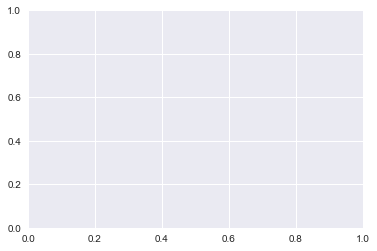

In [100]:
plt.plot(ts,rs)
plt.yscale('log')


Asking to see how a circular orbit will decay due to dynamical friction? 